## Problem 1 - Return Barra ID

In [ ]:
import sys

sys.path.append("C:\\Program Files (x86)\\MSCI Barra\\Barra Optimizer\\bin")
sys.path.append("C:\\Program Files (x86)\\MSCI Barra\\Barra Optimizer\\bin\\intel64")
sys.path.append("C:\\Program Files (x86)\\MSCI Barra\\Barra Optimizer\\tutorials\\python")

In [ ]:
url = "C:\\Users\\j4a3m\\Desktop\\NISAAAAA\\Code\\Asset\\USSLOW_Daily_Asset_Price.20220211"

import barraopt
from barraopt import CRiskModel
workspace = barraopt.CWorkSpace.CreateInstance()
Status = workspace.LoadAssetData(url)

In [ ]:
Status.GetStatusCode()

0

In [ ]:
import pandas as pd


# Generate dataframe of loaded assets, including ['Barrid', 'Price', 'Capt', 'PriceSource', 'Currency', 'DlyReturn%', 'DataDate']
def Get_Asset_Table():
    url = "C:\\Users\\j4a3m\\Desktop\\NISAAAAA\\Code\\Asset\\USSLOW_Daily_Asset_Price.20220211"
    workspace = barraopt.CWorkSpace.CreateInstance()
    Status = workspace.LoadAssetData(url)
    # Check loading Status
    if Status.GetStatusCode() != 0:
        print('Data laod unsuccessfully')

    # Create Asset Attribute Table
    Asset_row = []
    Columns = ['Barrid', 'Price', 'Capt', 'PriceSource', 'Currency', 'DlyReturn%', 'DataDate']
    for i in workspace.GetAssetIDSet():
        row = i.split('|')
        Asset_row.append(row)
    Asset_data = pd.DataFrame(data = Asset_row, columns = Columns)
    Asset_data = Asset_data[:-1]


    return Asset_data


# Get Top Marketcap ID
def get_top_cap_ID(num, Asset_data):

    # Cleanse null
    null_index = Asset_data[Asset_data.Capt == ''].index
    exluded_rows = Asset_data.index[null_index]
    Asset_data.drop(exluded_rows, inplace=True)
    Asset_data.Capt = Asset_data.Capt.astype('float')
    Asset_data = Asset_data.sort_values(by = 'Capt', ascending = False)
    ID_list = [n for n in Asset_data.Barrid[:num]]

    return ID_list

In [ ]:
Asset_data = Get_Asset_Table()
Asset_List = get_top_cap_ID(500, Asset_data)   # Return list of top 500 ID based on market cap
Asset_List

['COLAHG1',
 'COLAHB1',
 'COLAHI1',
 'COLAZP1',
 'COLAHH1',
 'COLAHJ1',
 'ARGAPG1',
 'COLAHE1',
 'USA0421',
 'COLAHM1',
 'ARGAQ41',
 'ARGAP91',
 'ARGARD1',
 'ARGAPI1',
 'ARGAQD1',
 'ARGAQ81',
 'USA03M1',
 'ARGARI1',
 'USA07H1',
 'USA05V1',
 'USA04Q1',
 'USA07A1',
 'ARGARF1',
 'USA06Y1',
 'UNSAP21',
 'USA04G1',
 'USA06W1',
 'USA01L1',
 'MEXAVK1',
 'USA01Q1',
 'ARGARA1',
 'HUNAGU1',
 'ARGAQ51',
 'ARGAMY1',
 'USA07L1',
 'USA03R1',
 'USA01P1',
 'USA0031',
 'ARGANQ1',
 'USA07M1',
 'MEXAYK1',
 'USA0401',
 'USA03H1',
 'USA03Z1',
 'USA0651',
 'USA07K1',
 'USA0562',
 'USA05J1',
 'MEXATJ1',
 'UNSAPU1',
 'USA07S1',
 'ARGAQX1',
 'USA07G1',
 'USA08A1',
 'USA00H1',
 'USA0062',
 'USA0131',
 'USA07C1',
 'USA00K1',
 'UNSAPZ1',
 'UNSAPY1',
 'USA01J2',
 'USA07W1',
 'USA02P1',
 'ARGAQP1',
 'USA04K1',
 'USA00P1',
 'MEXPDP1',
 'USA00I1',
 'MEXPDY1',
 'USA03V1',
 'ARGAQM1',
 'MEXAXA1',
 'BRABJM1',
 'ARGARH1',
 'HKGBKW1',
 'ARGAOU1',
 'ARGARG1',
 'MEXBAM1',
 'ARGAJH1',
 'ARGAOQ1',
 'BRABLX1',
 'ARGAOL1',
 'US

## Problem 2- Simulates stock prices of companies

In [ ]:
def AllFactors():
    url = "C:\\Users\\j4a3m\\desktop\\NISAAAAA\\Code\\All_Data"
    ws = barraopt.CWorkSpace.CreateInstance()
    rm = ws.CreateRiskModel('USSLOWL_100',barraopt.eEQUITY)
    rm.LoadModelsDirectData(url,20220211,ws.GetAssetIDSet(),0)
    FacId = rm.GetFactorIDSet()
    FactorIDAll = rm.GetFactorIDSet()
    NFactor = rm.GetNumFactors()
    FactorList = []
    for i in FactorIDAll:
        FactorList.append(i)
    return sorted(FactorList)


def COV():
    url = "C:\\Users\\j4a3m\\desktop\\NISAAAAA\\Code\\All_Data"
    ws = barraopt.CWorkSpace.CreateInstance()
    rm = ws.CreateRiskModel('USSLOWL_100',barraopt.eEQUITY)
    rm.LoadModelsDirectData(url,20220211,ws.GetAssetIDSet(),0)
    NFactor = rm.GetNumFactors()
    COV0 = []
    factors = AllFactors()
    for id1 in range(NFactor):
        COV0.append([1/252 * rm.GetFactorCovariance(factors[id1],factors[id2]) for id2 in range(NFactor)])
    return COV0

In [ ]:
# Stock Price Simulation by given num of days

def Simulation_price(ticker,n=1):
    url = "C:\\Users\\j4a3m\\desktop\\NISAAAAA\\Code\\All_Data"
    ws = barraopt.CWorkSpace.CreateInstance()
    rm = ws.CreateRiskModel('USSLOWL_100',barraopt.eEQUITY)
    rm.LoadModelsDirectData(url,20220211,ws.GetAssetIDSet(),0)

    factors_value = []  #create a list βi that contains the factor coefficients of the stock, 0 if no value

    for F in AllFactors():
        try:
            factors = rm.GetFactorExposureBySet(ticker)[F]
            factors_value.append(factors)
        except:
            factors_value.append(0)


    random_array = np.random.multivariate_normal([0]*len(AllFactors()),COV(),n)  # simulate the factors, default random 1 time
    return_list = []
    for num in random_array:
        ri = np.sum(np.array(factors_value) * num)   # Sum of multiply
        return_list.append(ri)

    Asset_return_rate = [x + 1 for x in return_list]
    Asset_data = Get_Asset_Table()   # Get starting price from asset table
    Asset_price = float(Asset_data.loc[Asset_data['Barrid']== ticker].Price)

    Simulate_price = [Asset_price]

    for i in Asset_return_rate:
        try:
            new_price = new_price * i
            Simulate_price.append(new_price)
        except:
            new_price = Asset_price * i
            Simulate_price.append(new_price)


    return Simulate_price    #return list of simulated price



In [ ]:
Asset_data = Get_Asset_Table()   # Get starting price from asset table
Asset_price = float(Asset_data.loc[Asset_data['Barrid']== 'ARGAPG1'].Price)
Asset_price

3628.0

In [ ]:
# Price simulation
import numpy as np
price_list_1 = Simulation_price('ARGAPG1', 500)
price_list_2 = Simulation_price('ARGAPG1', 500)
price_list_3 = Simulation_price('ARGAPG1', 500)
price_list_4 = Simulation_price('ARGAPG1', 500)
price_list_5 = Simulation_price('ARGAPG1', 500)

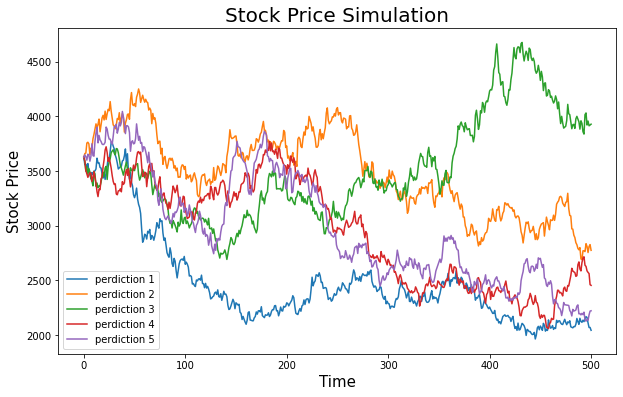

In [ ]:
# Plotting

import matplotlib.pyplot as plt
from matplotlib.pyplot import figure


# Set Y value
Time = [i for i in range(500+1)]  # number of price simulation + current price



# Draw Line
plt.figure(figsize=(10, 6))
plt.plot(Time, price_list_1, label = "perdiction 1")
plt.plot(Time, price_list_2, label = "perdiction 2")
plt.plot(Time, price_list_3, label = "perdiction 3")
plt.plot(Time, price_list_4, label = "perdiction 4")
plt.plot(Time, price_list_5, label = "perdiction 5")

# Add Text and Annotation
plt.legend()
plt.title('Stock Price Simulation', loc='center', fontsize=20, fontweight=0)
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 10)
plt.xlabel('Time', fontsize = 15)
plt.ylabel('Stock Price', fontsize = 15)


plt.show()